# Chapter 5: Boolean Indexing

## Recipes
* [5.1 Calculating boolean statistics](#5.1-Calculating-boolean-statistics)
* [5.2 Constructing multiple boolean conditions](#5.2-Constructing-multiple-boolean-conditions)
* [5.3 Filtering with boolean indexing](#5.3-Filtering-with-boolean-indexing)
* [5.4 Replicating boolean indexing with index selection](#5.4-Replicating-boolean-indexing-with-index-selection)
* [5.5 Selecting with unique and sorted indexes](#5.5-Selecting-with-unique-and-sorted-indexes)
* [5.6 Gaining perspective on stock prices](#5.6-Gaining-perspective-on-stock-prices)
* [5.7 Translating SQL WHERE clauses](#5.7-Translating-SQL-WHERE-clauses)
* [5.8 Determing normality of stock market returns](#5.8-Determing-normality-of-stock-market-returns)
* [5.9 Improving readability of boolean indexing with the query method](#5.9-Improving-readability-of-boolean-indexing-with-the-query-method)
* [5.10 Preserving DataFrames with the where method](#5.10-Preserving-DataFrames-with-the-where-method)
* [5.11 Masing DataFrame rows](#5.11-Masing-DataFrame-rows)
* [5.12 Selecting with booleans, integer location and labels](#5.12-Selecting-with-booleans,-integer-location-and-labels)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

# 5.7 Translating SQL WHERE clauses

In [2]:
### [Tech]sql의  where 절을 boolean filtering 으로 변환 할 수 있다!
###  컬럼명의 조회를 위해서  .value_counts().index 등을 활용할 수 있다.            
### [Goal] employee data에서 조건에 맞는 row와 원하는 컬럼만 선택해 본다. 
##        여성 경찰 또는 여성 소방 공무원
##       기본급이 8~12만 달러

## >> How it works...

In [3]:
#5.7.1 employee data set을 읽어 들이고, table의 개요를 살펴본다. 
employee = pd.read_csv('data/employee.csv')
employee.head(3).T

,0,1,2
UNIQUE_ID,0,1,2
POSITION_TITLE,ASSISTANT DIRECTOR (EX LVL),LIBRARY ASSISTANT,POLICE OFFICER
DEPARTMENT,Municipal Courts Department,Library,Houston Police Department-HPD
BASE_SALARY,121862,26125,45279
RACE,Hispanic/Latino,Hispanic/Latino,White
EMPLOYMENT_TYPE,Full Time,Full Time,Full Time
GENDER,Female,Female,Male
EMPLOYMENT_STATUS,Active,Active,Active
HIRE_DATE,2006-06-12,2000-07-19,2015-02-03
JOB_DATE,2012-10-13,2010-09-18,2015-02-03


In [4]:
 employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
UNIQUE_ID            2000 non-null int64
POSITION_TITLE       2000 non-null object
DEPARTMENT           2000 non-null object
BASE_SALARY          1886 non-null float64
RACE                 1965 non-null object
EMPLOYMENT_TYPE      2000 non-null object
GENDER               2000 non-null object
EMPLOYMENT_STATUS    2000 non-null object
HIRE_DATE            2000 non-null object
JOB_DATE             1997 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [5]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
UNIQUE_ID,2000.0,999.500000,577.494589,0.0,499.75,999.5,1499.25,1999.0
BASE_SALARY,1886.0,55767.931601,21693.706679,24960.0,40170.00,54461.0,66614.00,275000.0


In [6]:
employee.describe(include = 'object').T

,count,unique,top,freq
POSITION_TITLE,2000,330,SENIOR POLICE OFFICER,220
DEPARTMENT,2000,24,Houston Police Department-HPD,638
RACE,1965,6,Black or African American,700
EMPLOYMENT_TYPE,2000,5,Full Time,1954
GENDER,2000,2,Male,1397
EMPLOYMENT_STATUS,2000,2,Active,1991
HIRE_DATE,2000,999,2016-03-28,11
JOB_DATE,1997,947,2002-01-05,34


In [7]:
# 5.7.2 정확한 부서명의 확인 : value_counts()
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [8]:
#  급여 수준의 파악
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [9]:
# 5.7.3 개별 조건문 구성
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [10]:
# 5.7.4 개별 조건문을 and로 조합한 최종 조건문
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [11]:
# 5.7.5 추출하고자 하는 정보 : 사원번호, 부서, 성별, 기본급
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


## >> There's more... 5.7

In [12]:
# 5.7.3의 급여 조건은 between 문을 사용할 수 있다. 
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [13]:
# value_counts() 메소드를 통해 생성되는 Series의 행 index를 활용하면 상위 n 개와 관련된 
# 조건문 구성이 용이해진다.  
# 인원수 기준 상위 5개 부서를 제외한 부서라는 조건을 다음과 같이 column 명의 직접적인 
# 기술 없이 표현 할 수 있다. 
top_5_depts = employee.DEPARTMENT.value_counts().index[:5] # 상위 5개 부서명 목록
criteria = ~employee.DEPARTMENT.isin(top_5_depts) 
                            # isin을 ~으로 T/F를 뒤집어 제외부서 값만 남김
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13


In [14]:
top_5_depts

Index(['Houston Police Department-HPD', 'Houston Fire Department (HFD)',
       'Public Works & Engineering-PWE', 'Health & Human Services',
       'Houston Airport System (HAS)'],
      dtype='object')

# 5.8 Determing normality of stock market returns

In [15]:
### [Tech] z-score 가  n sigma 안에 들어오는지 비교한 Boolean Series를 구성한 다음, 
###       여기의 평균값을 구함으로서 True의 비율을 얻는다. 
#         [abs_z_score.lt(i).mean() for I in range (1,4)]
### [Goal] 주식의 수익율 분포가 정규성을 이루는지 검산해본다.
###    전일 대비 종가 수익율을 정규화 하여 z-score를 구한 다음,  
#      1 sigma, 2 sigma, 3 sigma (즉 z-score 1, 2, 3)의 값이 68-95-99.7 을 이루는지 확인

## >> How it works...

In [16]:
# 5.8.1 아마존 주가 정보를 csv로 부터 읽어 들인다. 
#        종가가 Close 컬럼으로 관리 되고 있다. 
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [17]:
amzn.shape

(1896, 5)

In [18]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1896 entries, 2010-01-04 to 2017-07-17
Data columns (total 5 columns):
Open      1896 non-null float64
High      1896 non-null float64
Low       1896 non-null float64
Close     1896 non-null float64
Volume    1896 non-null int64
dtypes: float64(4), int64(1)
memory usage: 88.9 KB


In [19]:
amzn.notnull().any().any()

True

In [20]:
# 5.8.2 전일 대비 수익률을 개산한다. 
#  Series 에서 pct_chage() 메소드를 이용해서 전일 대비 변동률 (= 수익율)을 얻는다. 
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

In [21]:
# pct_change --> Series, DataFrame 에 적용 가능
#pd.Series.pct_change?

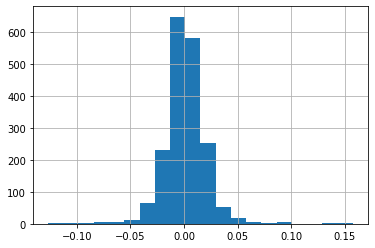

In [22]:
# 5.8.3 histogram으로 시각화 해본다. 일단 좌우 대칭은 갖춘 것 같아 보인다. 
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [23]:
# 5.8.4 정규화 하여 z-score를 구한다. 
#      z-score =   (x-mean)/ std
mean = amzn_daily_return.mean()  
std = amzn_daily_return.std()
mean, std

(0.0012631309530525448, 0.019861559267099153)

In [24]:
# 표준편차
# pd.Series.std? , default는 ddof =1  불편분산
amzn_daily_return.std(ddof = 0)

0.019856318058598582

In [25]:
# 5.8.5 z-score의 절대값을 구한다. 
abs_z_score = amzn_daily_return.sub(mean).div(std).abs()
abs_z_score.head()

Date
2010-01-05    0.233456
2010-01-06    0.975694
2010-01-07    0.920188
2010-01-08    1.299686
2010-01-11    1.274043
Name: Close, dtype: float64

In [26]:
# 5.8.6 z-score 가 각각 1 ,2,3 sigma 안에 들어오는 데이터의 비율을 구한다. 
#     표준화 되어 있으므로 각각 1, 2, 3 안에 들어오는 비율에 해당한다. 
#     Boolean Series를 구한 다음,  평균을 계산하면 비율이 된다. 
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print ('{:.3f} fall within 1 standard deviation.'
      '{:.3f} fall within 2 and {:.3f} within 3'.format(*pcts))


0.787 fall within 1 standard deviation.0.956 fall within 2 and 0.985 within 3


In [84]:
pcts

[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]

In [27]:
#  68-95-99.7 와 비교하면, 2 sigma 이내 비율은 비슷하나. 1 sigma 는 78 % 로
# 평균 부근의 값이 쏠린 모양새가 된다. 한편 3sigmasms 98.5 정도로 꼬리에 해당하는 값 
# (큰 폭의 변동)이 정규분포에 따른다고 하기에는 많이 발생했다. 

## >> There's more... 5.8

In [28]:
#  일정 기간의 주가 정보로 부터 종가의 일별 수익률 변동을 구하고 , 
#  histogram으로 시각화와 1-2-3 sigma내 데이터 항목 분포 값을 제공하여
# 정규 분포 여부를 판단 할 수 있게 한다. 
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean() 
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]

    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


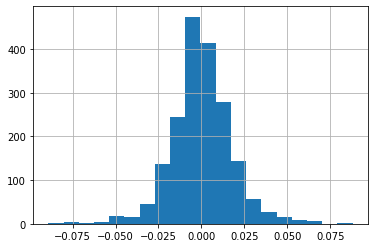

In [29]:
# slb 주가 정보로 정규성 여부 테스트
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

In [30]:
# amazon의 경우와 마찬가지로 중심부 1 sigma 이내와 3sigma 밖에가 더 두터운 모양으로 
# 분포하며 정규 분포로 보기 어렵다. 

# 5.9 Improving readability of boolean indexing with the query method

In [31]:
### [Tech] df.query() 메소드를 이용하여 필요한 row 인덱스를 필터링 한다. 
###       .query() 의 매개변수는 SQL의 where 절 문법을 따르며, 파이썬 변수는 @에 이어 사용한다.
### [Goal] 5.7 과 동일한 조건을 query() method로 구현한다. 
###        즉, employee 데이터 셋으로 부터 
###            8~ 12만 달러의 기본급인 여성 소방관 또는 여성 경찰관을 추출해 본다. 

## >> How it works...

In [32]:
# 5.9.1 employee.csv 를 load 하고 depts, select_columns 를 지정한다. 
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [33]:
# 5.9.2 파이썬 문법 (또는 SQL의 where 절 문법)으로 filter 할 문장을 구성하고 
#      .query()를 수행한다. 
query_string = "DEPARTMENT in @depts " \
               "and GENDER == 'Female' " \
               "and 80000 <= BASE_SALARY <= 120000"
        
emp_filtered = employee.query(query_string)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


## >>There's more... 5.9

In [34]:
# 인원 상위 10개 부서를 제외한 부서에 속하면서 여성 직원 추출
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
employee_filtered2 = employee.query("DEPARTMENT not in @top10_depts and GENDER == 'Female'")
employee_filtered2[['DEPARTMENT', 'GENDER']].head()

,DEPARTMENT,GENDER
0,Municipal Courts Department,Female
73,Human Resources Dept.,Female
96,City Controller's Office,Female
117,Legal Department,Female
146,Houston Information Tech Svcs,Female


# 5.10 Preserving DataFrames with the where method

In [35]:
### [Tech]df.where() 메소드를 이용해서 Boolean indexing의  False 값을 삭제하는 대신,
###    NaN 처리함 또는  other parameter,를 활용하여 다른 값으로 변환 함
###    if 조건 문 처럼 사용할 수 있음 (cf. numpy.where)
### [Goal] movie 에서 facebook 좋아요의 상한/하한을 벗어나는 outlier 값을 상한/하한으로 치환
###         actor_1_facebook_likes 의 20000 이상을 20000으로, 300 이하를 300으로 조정한다.

In [36]:
# pd.DataFrame.where?

## >> How it works...

In [37]:
# 5.10.1 movie.csv를 movie_title을 인덱스로 하여 load 하고,
#      'actor_1_facebook_likes' 의 정상적인 값으로만 구성된 fb_likes Series를 구성한다.
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [38]:
# 5.10.2  fb_likes의 상하위 10% 경계선 값을 확인한다.  240~ 18,000 이며, 최대값은 64,000 이다.
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

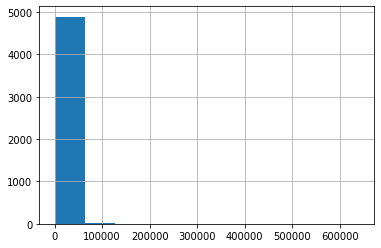

In [39]:
# 5.10.3  histogram을 살펴보면 데이터가 왼쪽으로 쏠려있고, 오른쪽으로 꼬리가 길어
#        분포의 모습을 확인하기 어렵다. 
fb_likes.hist();

In [40]:
# 5.10.4 20,000 건 이하의 비율이 약 90% 를 넘는다.
#   20000과 비교하여 큰 값이 False가 되는 Boolean Series criteria_high를 만든다. 
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [41]:
#  fb_like 
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [42]:
# criteria_high : Boolean Series  fb_likes < 20000
criteria_high.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens     True
Name: actor_1_facebook_likes, dtype: bool

In [43]:
# 5.10.5  20,000 보다 큰 값을 NaN으로 바꾸어 보기 (cf. Boolean filter 는 삭제되어 버림)

fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [44]:
# 5.10.6 20,000 보다 큰 값을 20,000으로 바꾸어 보기, where 메소드에 other 매개변수에 
#       치환할 값을 전달 (default는 nan)
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [45]:
# 5.10.7 동일한 요량으로 하한 300 이상 여부로 criteria_low Boolean Series를 구성하고,
#        where 절을 chaining 한다. 
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000)\
                                   .where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [46]:
# 5.10.8 원본 대비 행 row 가 줄어 들지 않았음을 확인
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

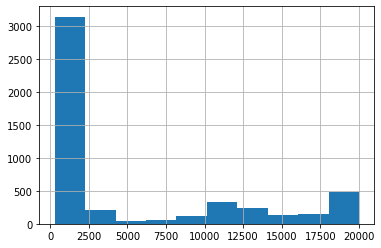

In [47]:
# 5.10.9 cap을 주어 조정 한 fb_likes_cap을 histogram으로 시각화
#  여전히 좌쏠림이지만 10,000 이상의 영화도 제법 있음을 확인 할 수 있다. 
fb_likes_cap.hist()

## >>There's more... 5.10

In [79]:
# pandas에 위 where절과 동일한 기능을 수행하는 .clip() method가 있다. 
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.equals(fb_likes_cap)

True

In [49]:
# DataFrame에 적용하면, 해당 행의 모든 값을 other의 값으로 치환한다. 
movie.where(criteria_high, other=20000).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,20000,20000,20000.0,20000.0,20000.0,20000.0,20000,20000.0,20000.0,20000,...,20000.0,20000,20000,20000,20000.0,20000.0,20000.0,20000.0,20000.00,20000
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,20000,20000,20000.0,20000.0,20000.0,20000.0,20000,20000.0,20000.0,20000,...,20000.0,20000,20000,20000,20000.0,20000.0,20000.0,20000.0,20000.00,20000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# 5.11 Masking DataFrame rows

In [50]:
### [Tech]True 조건인 행을 Nan으로 masking 한다. where절의 반대임
###       mask 실행 후, NaN이 발생하면 정수 열의 type 은 실수로 변경 됨.
###            a.dtypes != b.dtypes  이 될  수 있음
### [Goal] movie에서 2010년 이후 만들어진 영화를 masking 한 다음, 모든 누락값이 있는 행을 삭제한다. 

## >> How it works...

In [51]:
# 5.11.1  movie.csv를 movie_title을 인덱스로 하여 load 하고,
#        2010년 이후 제작 되었거나, 누락값을 갖는 행을 선별한 Boolean Series criteria 생성
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
criteria = (movie['title_year'] >= 2010) | (movie['title_year'].isnull())

In [52]:
movie['title_year'].head()

movie_title
Avatar                                        2009.0
Pirates of the Caribbean: At World's End      2007.0
Spectre                                       2015.0
The Dark Knight Rises                         2012.0
Star Wars: Episode VII - The Force Awakens       NaN
Name: title_year, dtype: float64

In [53]:
criteria.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     True
Name: title_year, dtype: bool

In [54]:
# 5.11.2  criteria 가 참인 row 의 모든 값을 NaN으로 치환 (= masking) 한다.
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# 5.11.3  masking 하여 행의 모든 값이 NaN 이 된 행을 삭제한 movie_mask DataFrame을 생성한다. 
movie_mask = movie.mask(criteria).dropna(how='all')
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [56]:
# 5.11.4  동일한 작업을 Boolean indexing을 사용해서 구하고 movie_boolean에 저장한다. 
movie_boolean = movie[movie['title_year'] < 2010]
movie_boolean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0


In [57]:
# movie_mask와  movie_boolean이 같은지 비교해보면, 다르다고 나온다. 
movie_mask.equals(movie_boolean)

False

In [58]:
# 5.11.5 두 DataFrame의 shape를 비교하면 shape는 같다고 나온다. 
movie_mask.shape == movie_boolean.shape

True

In [59]:
# 5.11.6 두 DataFrame의 data type이 같은지 확인하기 위해, 각 df의 .dtype 속성이 같은지 
#        비교해 보면, 몇 몇 컬럼에서 서로 다른 데이터 형을 갖고 있음을 알 수 있다. 
#        이는 NaN 처리하면서 int 형이 float 형으로 바뀌면서 발생한 현상이다. 
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [60]:
cols=['num_voted_users','cast_total_facebook_likes','movie_facebook_likes']
print ("movie_mask >>>\n", movie_mask[cols].dtypes)

print ("\n\nmovie_boolean >>>\n", movie_boolean[cols].dtypes)

movie_mask >>>
 num_voted_users              float64
cast_total_facebook_likes    float64
movie_facebook_likes         float64
dtype: object


movie_boolean >>>
 num_voted_users              int64
cast_total_facebook_likes    int64
movie_facebook_likes         int64
dtype: object


In [80]:
# 5.11.7  이렇게 data type의 차이를 무시하고 비교할 수 있는 assert_frame_equal 함수가
#     pandas.testing 모듈에서 제공된다.  assert 오류가 발생하지 않은면 같은 값임.

#   
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype=False)

In [81]:
# 5.11.7  이렇게 data type의 차이를 무시하고 비교할 수 있는 assert_frame_equal 함수가
#     pandas.testing 모듈에서 제공된다.  assert 오류가 발생하지 않은면 같은 값임.

#   

assert_frame_equal(movie_boolean, movie_mask, check_dtype=True)

AssertionError: Attributes are different

Attribute "dtype" are different
[left]:  int64
[right]: float64

In [62]:
# pandas.testing은 개발 과정의 test 단계에서 사용할 수 있는 유용한 함수를 제공한다.
# 동일한 요령으로 Series와 Index도 비교할 수 있다. 
dir (pd.testing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'assert_frame_equal',
 'assert_index_equal',
 'assert_series_equal']

## >>There's more... 5.11

In [63]:
# masking 보다는 boolean filter가 10배 이상 빠르다. 
%timeit movie.mask(criteria).dropna(how='all')

73.8 ms ± 8.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%timeit movie[movie['title_year'] < 2010]

3.4 ms ± 596 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 5.12 Selecting with booleans, integer location and labels

In [65]:
### [Tech]loc , .iloc 에서  boolean array /Series의 사용
###      .loc[criteria]  == .iloc[criteria.values]
###      컬럼에 대해서도  boolean indexing 적용 가능하다. 
### [Goal] movie에서 G 등급에 평점이 4 보다 낮은 값을 갖는 경우를 추출하되,
#        .loc, .iloc 인덱서를 적용해서 구해본다. 

## >> How it works...

In [66]:
# 5.12.1  movie.csv를 movie_title을 인덱스로 하여 load 하고, 
#     구하고자 하는 조건인 등급 G, 평점 4 미만을 판별한 criteria Boolean Series를 생성한다. 
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
criteria = (movie['content_rating'] == 'G') & (movie['imdb_score'] < 4)

In [67]:
# 5.12.2  .loc 인덱서에 Boolean Series를 전달하면 원하는 조건으로 잘 선택 된다. 
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [68]:
# 5.12.3   .loc 를 통해서 필터한 값과  직접 인덱스 연산자에 입력한 값이 같은지 비교해보면
#        같은 것을 확인 할 수 있다. 
movie_loc.equals(movie[criteria])

True

In [69]:
# 5.12.4  .iloc 인덱서에 Boolean Series를 전달하면 오류가 발생한다. 
#       이는 iloc가 index label로 처리하지 않는데, criteria는 index label을 갖기 때문이다. 
movie_iloc = movie.iloc[criteria]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [70]:
# 5.12.5  iloc에는 cirteria의 index를 제외한 .values만 전달하면 잘 작동한다. 
print (criteria.values)
movie_iloc = movie.iloc[criteria.values]
movie_iloc.equals(movie_loc)

[False False False ... False False False]


True

In [71]:
# 5.12.6 Boolean indexing은 컬럼에도 적용할 수 있다.  int64인 data type을 갖는 컬럼만 
#       선별하여 남겨보는 과정을 Boolean indexing으로 진행해본다. 
#       .select_dtypes() 와 동일하다. 
#  컬럼 중 dtypes 가 np.int64 일 경우 True 가 되는 Boolean Series를 생성한다. 
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [72]:
# loc 인덱서의 인덱스 연산자 [] 2번째 인수로 전달 하면 컬럼에 적용되고, 
#   조건을 충족하는  컬럼만 남는다. 
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [73]:
# 5.12.7 동일한 동작을 iloc로 구현하고자 한다면,  Boolean Series에서 value 만 전달한다. 
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [74]:
# 5.12.8 G등급 평점 4 미만 조건을 만족하는 행에 대해서 평점 순으로 정렬한 영화의 목록을 
#     .loc로 구한다. 
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [75]:
# 5.12.9  위 5.12.8 과 동일한 값을 iloc로 구해본다.
col_index = [movie.columns.get_loc(col) for col in cols]
print (col_index)
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

[20, 24, 22, 8]


,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [76]:
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


## >> There's more... 5.12

In [77]:
# .iloc 에는 인덱스가 없는 ndarray boolean 만 전달 할 수 있다. 
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [78]:
len(a), len(criteria)

(4916, 4916)